In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from ipynb.fs.full.Kl2_ha_Functions import EquivalenteP_const_n, lagerbelastung, passfeder, olagerbelastung, zylinder_lagerbelastung, Nadellager_lagerbelastung, EquivalenteP, n_Equivalent,EMLebensdauer, zahnwelle_lange

,Stahl,Grauguss,Temperguss,Bronze/Messing,AlCuMg-leg,AlMg,AlSi
0,150,90,110,50,100,90,70


,Nutkeilen/Polygonwellen,Hohlkeile,Flachkeile,Passfeder/KeilWelle/Zahnwelle
einseitig ruhend,1.10,0.15,0.17,0.80
"einseitig, leichte Stöße",1.00,0.15,0.17,0.70
einseitig starke Stöße,0.75,0.10,0.11,0.60
"Wechelnd, leichte Stöße",0.60,0.00,0.00,0.45
"Wechselnd, Starke Stoße",0.45,0.00,0.00,0.25


d = 24.0mm
d2 = 24.0mm
d3 = 26.7mm
pzul=105.0N/mm^2
25.3093535001819
1.0679052109781393


In [2]:
Pab=20000
n_an1=1460
n_ab1=350
sigma_w=350
rho_o=150
Rz=0.02

m_n=4
z1=23
z3=z1
b=35
beta=12
alpha_n=20
etha=100

# Berechnung von Ubersetzung und Zähnezahl

In [3]:



i_ges=n_an1/n_ab1
print(f"i_ges= {i_ges}\n")

i12 = math.sqrt(i_ges)
i34 = i12
print(f"i12 = i34= {i34}\n")

z2 = i12 * z1
print(z2)
z2_real = round(z2)
print(f"z2 = z4 = {z2_real}\n")

i_ges= 4.171428571428572

i12 = i34= 2.042407542932745

46.97537348745313
z2 = z4 = 47



# Berechnung von Abweichung von Drehzahlen

In [4]:
i_12_real = z2_real/z1
print(i_12_real)

i_ges_real = (z2_real/z1)**2
print(f"i_ges_real= {i_ges_real}\n")

n_ab_real = n_an1/i_ges_real
print(f"n_ab_real = {n_ab_real}\n")

delta_n = (n_ab_real - n_ab1)/n_ab1
print(f"delta_n= {delta_n}")




2.0434782608695654
i_ges_real= 4.175803402646504

n_ab_real = 349.633318243549

delta_n= -0.0010476621612885344


# Zahnrad geometrien

In [5]:


mt = m_n/np.cos(math.radians(beta))
print(f"mt= {mt}")
print()

d1= z1 * mt
d2= z2 * mt
d3 = d1
d4 = d2

da1 = d1 +2*m_n
da2 = d2 +2*m_n
da3 = da1
da4 = da2

df1 = d1 -2*(m_n+ 0.25*m_n)
df2 = d2 -2*(m_n+ 0.25*m_n)
df3 =df1
df4 = df2

di = [d1,d2,d3,d4]
dai = [da1,da2,da3,da4]
dfi = [df1,df2,df3,df4]

a12 = 0.5*(d1+d2)

for i in range(4):
    print(f"Zahnrad{i+1}:")
    print(f"d{i+1}= {di[i]}mm")
    print(f"da{i+1}= {dai[i]}mm")
    print(f"df{i+1}= {dfi[i]}mm\n")
    
print(f"a12 = a34 ={a12}mm")
    




mt= 4.089362379460117

Zahnrad1:
d1= 94.05533472758269mm
da1= 102.05533472758269mm
df1= 84.05533472758269mm

Zahnrad2:
d2= 192.09932510067904mm
da2= 200.09932510067904mm
df2= 182.09932510067904mm

Zahnrad3:
d3= 94.05533472758269mm
da3= 102.05533472758269mm
df3= 84.05533472758269mm

Zahnrad4:
d4= 192.09932510067904mm
da4= 200.09932510067904mm
df4= 182.09932510067904mm

a12 = a34 =143.07732991413087mm


# Berechnung der Zahnradkräfte

In [6]:


M_ab = (Pab*60000)/(2*math.pi*n_ab1)
M_an = M_ab/i_ges

print(f"M_ab= {M_ab}Nmm")
print(f"M_an= {M_an}Nmm\n")

Ft1 = (2*M_an)/d1
Fr1 = Ft1 * np.tan(math.radians(alpha_n))/np.cos(math.radians(beta))
Fa1 = Ft1 * np.tan(math.radians(beta))

Ft2 = Ft1
Fr2 = Fr1
Fa2 = Fa1

Ft3 = (2*M_ab)/d4
Fr3 = Ft3 * np.tan(math.radians(alpha_n))/np.cos(math.radians(beta))
Fa3 = Ft3 * np.tan(math.radians(beta))

Ft4 = Ft3
Fr4 = Fr3
Fa4 = Fa3

Fti = [Ft1,Ft2,Ft3,Ft4]
Fri = [Fr1,Fr2,Fr3,Fr4]
Fai = [Fa1,Fa2,Fa3,Fa4]

for i in range(4):
    print(f"Zahnradkräfte{i+1}:")
    print(f"Ft{i+1}= {Fti[i]}N")
    print(f"Fr{i+1}= {Fri[i]}N")
    print(f"Fa{i+1}= {Fai[i]}N\n")






M_ab= 545674.090600784Nmm
M_an= 130812.28199333863Nmm

Zahnradkräfte1:
Ft1= 2781.602603876048N
Fr1= 1035.038628739391N
Fa1= 591.2478854122733N

Zahnradkräfte2:
Ft2= 2781.602603876048N
Fr2= 1035.038628739391N
Fa2= 591.2478854122733N

Zahnradkräfte3:
Ft3= 5681.1661395978035N
Fr3= 2113.970702564097N
Fa3= 1207.569140909062N

Zahnradkräfte4:
Ft4= 5681.1661395978035N
Fr4= 2113.970702564097N
Fa4= 1207.569140909062N



# Wirkende Torsionsmomente 


In [7]:

T1=M_an/1000
T2=(Ft2*d2)/2000
T3=(Ft3*d3)/2000
T4=M_ab/1000

Ti = [T1,T2,T3,T4]

for i in range(len(Ti)):
    print(f"T{i+1}= {Ti[i]}Nm")

T1= 130.81228199333864Nm
T2= 267.17199145144014Nm
T3= 267.1719914514401Nm
T4= 545.6740906007841Nm


In [8]:
# Sicherheit = 3 (Wirschaftlich konstruieren)
s=3

# Welle Durchmesser nach Niemann/Winter (reine Torsion)

In [9]:


dwi=[]
for i in range(len(Ti)):
    dw = 1.72* ((0.7*s*Ti[i]*1000)/sigma_w)**(1/3)
    print(f"dw{i+1} = {math.ceil(dw)}mm")
    dwi.append(dw)
    
dw1=math.ceil(dwi[0])
dw2=math.ceil(dwi[1])
dw3=math.ceil(dwi[2])
dw4=math.ceil(dwi[3])

    

dw1 = 16mm
dw2 = 21mm
dw3 = 21mm
dw4 = 26mm


# Längenangaben (mm)

In [10]:


lan1=80
lan2=105
lzw1=80
lzw2=131.3
lzw3=182.2
lab1=51.3
lab2=103.9

# Lagerkräfte Berechnung

In [11]:


### Using linear algebra the system of equations is going to be written like A*X = B, 

#A represents the factors
#X represents all the Bearing forces
#B represents the solutions

A=np.array([[1,0,1,0,0,0,0,0,0,1,0,0,0,0],
            [0,1,0,1,0,0,0,0,0,0,1,0,0,0],
            [0,0,0,lan1,0,0,0,0,0,0,lan2,0,0,0],
            [0,0,lan1,0,0,0,0,0,0,lan2,0,0,0,0],
            [0,0,0,0,1,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,1,0,1,0,0,0,0,0,0],
            [0,0,0,0,0,0,1,0,1,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,lzw3,0,0,0,0,0],
            [0,0,0,0,0,0,0,lzw3,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,1,0,0],
            [0,0,0,0,0,0,0,0,0,1,0,0,1,0],
            [0,0,0,0,0,0,0,0,0,0,1,0,0,1],
            [0,0,0,0,0,0,0,0,0,0,lab2,0,0,0],
            [0,0,0,0,0,0,0,0,0,lab2,0,0,0,0]])

B=np.array([Fr1,
            Ft1,
            Ft1*lan2,
            Fr1*lan2-Fa1*(d1/2),
            Fa3-Fa1,
            Fr1-Fr3,
            Ft1-Ft3,
            Ft1*lzw1-Ft3*lzw2,
            Fr1*lzw1+Fa1*(d2/2)+Fr3*lzw2-Fa3*(d3/2),
            -Fa3,
            -Fr3,
            Ft3,
            Ft3*(-lab1+lab2),
            Fr3*(lab1-lab2)+Fa3*(d4/2)])


X=np.linalg.solve(A,B)
Ay = X[0]
Az = X[1] 
By = X[2]
Bz = X[3]
Cx = X[4]
Cy = X[5]
Cz = X[6]
Dy = X[7]
Dz = X[8]
Ey = X[9]
Ez = X[10]
Fx = X[11]
Fy = X[12]
Fz = X[13]




In [12]:
Cy=(Fr1*(lzw3-lzw1)-Fa1*(d2/2)+Fr3*(lzw3-lzw2)+Fa3*(d3/2))/lzw3
Cz = (Ft1*(lzw3-lzw1)+Ft3*(lzw2-lzw3))/lzw3

Dy=(Fr1+Fr3)-Cy
Dz=(Ft1-Ft3)-Cz

In [13]:
#Radialkräfte der Lager [N]
Fra=(By**2+Bz**2)**0.5
Frb=(Ay**2+Az**2)**0.5
Ka=Fa1
Ya= 0.57
Yb=Ya


#Belastungsverhältnisse

print(f"Fra/Ya = {Fra/Yb} ; Frb/Yb= {Frb/Yb}")

if Fra/Ya <= Frb/Yb and Ka >= 0:
    print("Fall 1:")
    Fa=Ka + 0.5*(Frb/Yb)
    Fb=0.5*Frb/Yb
elif Fra/Ya > Frb/Yb and Ka > 0.5*(Fra/Ya-Frb/Yb):
    print("Fall 2:")
    Fa=Ka + 0.5*(Frb/Yb)
    Fb=0.5*Frb/Yb
elif Fra/Ya > Frb/Yb and Ka <= 0.5*(Fra/Ya-Frb/Yb):
    print("Fall 3:")
    print(f"0.5*{Fra}/{Yb}")
    Fa=0.5*(Fra/Ya)
    Fb=0.5*Fra/Ya-Ka
    print(f"{0.5*(Fra/Ya-Frb/Yb)}")
    
print('Resultierende Axialkräfte')
print(f'\nLager Ax:{Fb} N')
print(f'\nLager Bx:{Fa} N')

Ax=Fb
Bx=Fa

Fra/Ya = 1681.5043681505483 ; Frb/Yb= 85.16797191821628
Fall 3:
0.5*958.4574898458125/0.57
798.168198116166
Resultierende Axialkräfte

Lager Ax:249.5042986630009 N

Lager Bx:840.7521840752742 N


In [14]:

Lagerkräfte=[Ax,Ay,Az,Bx,By,Bz,Cx,Cy,Cz,Dy,Dz,Ey,Ez,Fx,Fy,Fz]
name_Lagerkräfte=["Ax","Ay","Az","Bx","By","Bz","Cx","Cy","Cz","Dy","Dz","Ey","Ez","Fx","Fy","Fz"]



for i in range(len(Lagerkräfte)):
    print(f"{name_Lagerkräfte[i]}: {round(Lagerkräfte[i],2)}N")


Ax: 249.5N
Ay: 38.53N
Az: 29.54N
Bx: 840.75N
By: 950.39N
Bz: -124.06N
Cx: 616.32N
Cy: 1171.14N
Cz: -26.85N
Dy: 1977.87N
Dz: -2872.72N
Ey: 46.12N
Ez: 2876.12N
Fx: -1207.57N
Fy: -2160.09N
Fz: 2805.04N






# Erste Welle

## Schnittlasten Erste Welle

In [15]:
def Normal(x):
    y = np.array([])
    
    for x_value in x:
        if x_value<=lan1:
            N=Ax
            
        else:
            N=Ax-Bx
        y = np.append(y,N)
    return y


def Q_ges(x):
    y = np.array([])
    for x_value in x:
        if x_value<=lan1:
            Qy=Ay
            Qz=Az
            Qges=np.sqrt(Qy**2 + Qz**2)
        else:
            Qy=Ay+By
            Qz=Az+Bz
            Qges=np.sqrt(Qy**2 + Qz**2)
        y = np.append(y,Qges)
    return y


def M_t(x):
    y = np.array([])
    for x_value in x:
        Mt = -M_an/1000
        y = np.append(y,Mt)
    return y


def Mb_ges(x):
    y = np.array([])
    for x_value in x:
        if x_value<=lan1:
            Mby=(Az*x_value)
            Mbz=(-Ay*x_value)
            Mbges=np.sqrt((Mby**2) + (Mbz**2))/1000
                 
        else:
            Mby=(Ez*(lan2-x_value))+(Ft1*(x_value-lan2))
            Mbz=(Ey*(x_value-lan2))+(Fr1*(lan2-x_value))-(Fa1*(d1/2))
            Mbges=np.sqrt((Mby**2) + (Mbz**2))/1000
        y=np.append(y,Mbges)
    return y
            
    
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)
        
        

        

## Schnittkräfte

249.5042986630009
-591.2478854122733


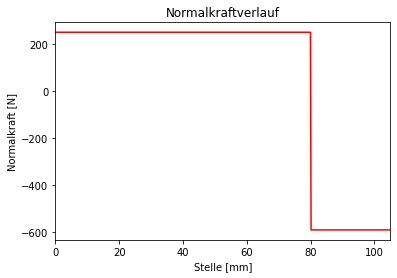

In [16]:
plt.xlim(0,lan2)

ax = plt.subplot()

x = np.linspace(0,lan2,500)

y = Normal(x)
plt.plot(x,y,"-r")


plt.title("Normalkraftverlauf")
plt.ylabel("Normalkraft [N]")
plt.xlabel("Stelle [mm]")

print(max(y))
print(min(y))


## Schnitt-momente 

-130.81228199333864
27.805008884713406


Text(0.5, 0, 'Stelle [mm]')

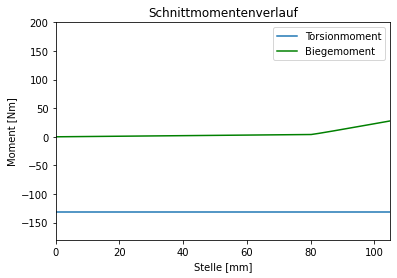

In [17]:
plt.xlim(0,lan2)
plt.ylim(-180, 200)
x = np.linspace(0,lan2,500)
ax = plt.subplot()

y = M_t(x)
print(max(y))

plt.plot(x,y,label="Torsionmoment")

y = Mb_ges(x)
print(max(y))

plt.plot(x,y,"-g",label="Biegemoment")
leg = ax.legend()

plt.title("Schnittmomentenverlauf")
plt.ylabel("Moment [Nm]")
plt.xlabel("Stelle [mm]")


# Lager Lebensdauer

In [18]:
a_iso = 1
a1 = 0.25

## Lager A

In [19]:
#lager: FAG 7007-B-XL-TVP
Cr_A=24300

In [20]:
Cr_A=24300
P_A1 = olagerbelastung(n_an1,Ax,Ay,Az)
P_A2 = 0
print()
Peq_A = EquivalenteP(P_A1, 1, n_an1, P_A2, 1, 0, 9/3)
neq_A = n_Equivalent(n_an1,0)
EMLebensdauer(a1, a_iso,Cr_A, Peq_A,neq_A , 9/3)

Die resultierende Radiallast ist: 48.545743993383276 N
Die resultierende Axiallast ist: 249.5042986630009 N
FA/FR > 1.14 --> P = 0.57*FR + 0.93 * FAx
Der Wert der äquivalenten Lagerbelastung ist: 259.7100718328193 N

1534512686333.66
0.0
Equivalente P= 3980.3655546619316 N
n_eq = 876.0
EM Lebensdauer = 3896162.803505173 h


## Lager B

In [21]:
#Lager: FAG 7008-B-XL- TVP

In [22]:
Cr_B=28000

## Lager C

In [23]:
n_2 = n_ab1 * i_12_real
print(f"n_2 = {round(n_2,2)} U/min")

#n_2 = ((60 * n_2)+(40 * 0))/100


n_2 = 715.22 U/min


In [24]:
#Lager: 16011-A
Cr_C=19300
Cor_C=16300
fo_C =16.20

if Cx < 0 :
    Cx=-1*Cx

In [25]:
P_C1 = lagerbelastung(Cor_C,fo_C,n_2,Cx,Cy,Cz)
P_C2 = 0

Peq_C = EquivalenteP_const_n(P_C1, 1, n_2, P_C2, 1, n_2, 9/3)

neq_C = n_2
print(neq_C)
EMLebensdauer(a1, a_iso,Cr_C, Peq_C,neq_C , 9/3)

Die resultierende Radiallast ist: 1171.4496 N
Die resultierende Axiallast ist: 616.3212554967888 N
Der Faktor FA/FR ist 0.5261
 fo*FA/Cro = 0.612540143499876
Der Wert von e (interpoliert) ist: 0.2513
Der Wert von y (interpoliert) ist: 1.7381
P= x*FR + y*FA
Der Wert der äquivalenten Lagerbelastung ist: 1727.1779 N
309145170288.26886
0.0
Equivalente P= 1456.758257960412 N
715.2173913043479
EM Lebensdauer = 13547.53098732706 h


## Lager D

In [26]:

#lager: 6308
Cr_D=45500
Cor_D=25000
fo_D =13
Dx=0

if Dx < 0 :
    Dx=-1*Cx


In [27]:
P_D1 = lagerbelastung(Cor_D,fo_D,n_2,Dx,Dy,Dz)
P_D2 = 0

Peq_D = EquivalenteP_const_n(P_D1, 1, n_2, P_D2, 1, n_2, 9/3)

neq_D = n_2

print()
EMLebensdauer(a1, a_iso,Cr_D, Peq_D,neq_D , 9/3)

Die resultierende Radiallast ist: 3487.7584 N
Die resultierende Axiallast ist: 0 N
Der Faktor FA/FR ist 0.0000
 fo*FA/Cro = 0.0
Der Wert von e (interpoliert) ist: 0.2200
Der Wert von y (interpoliert) ist: 2.0000
P=FR
Der Wert der äquivalenten Lagerbelastung ist: 3487.7584 N
2545601470927.9355
0.0
Equivalente P= 2941.6893244247094 N

EM Lebensdauer = 21557.305120549663 h


## Lager F

In [28]:
#Lager: 6308-C

#Cr_F=47000
#Cor_F=25000
#fo_F =13.00

#falls 6307-c

Cr_F=37000
Cor_F=19100
fo_F =13.10


if Fx <0:
    Fx= (-1)*Fx
    


In [29]:
#n_F = n_ab1 
n_F = n_ab1

print(f"{n_F} U/min")

350 U/min


In [30]:
P_F1 = lagerbelastung(Cor_F,fo_F,n_F,Fx,Fy,Fz)
P_F2 = 0

Peq_F = EquivalenteP_const_n(P_F1, 1, n_F, P_F2, 1, n_F, 9/3)

neq_F = n_ab1

EMLebensdauer(a1, a_iso, Cr_F, Peq_F, neq_F, 9/3)

Die resultierende Radiallast ist: 3540.3736 N
Die resultierende Axiallast ist: 1207.569140909062 N
Der Faktor FA/FR ist 0.3411
 fo*FA/Cro = 0.8282280495240164
Der Wert von e (interpoliert) ist: 0.2728
Der Wert von y (interpoliert) ist: 1.6195
P= x*FR + y*FA
Der Wert der äquivalenten Lagerbelastung ist: 3937.6637 N
3663254571901.366
0.0
Equivalente P= 3321.1541482247453 N
EM Lebensdauer = 16461.097445622512 h


## Lager E

In [31]:
n_e = n_an1 - n_ab1
print(n_e)

1110


In [32]:
#lager: NK32/20-TV-XL
Ex=0
Cr_E=28000

In [33]:
P_E1 = Nadellager_lagerbelastung(n_e,Ey,Ez)
P_E2 = 0

Peq_E = EquivalenteP(P_E1, 1, n_e, P_E2, 1, n_ab1, 10/3)

neq_E = n_Equivalent(n_e,n_ab1)

EMLebensdauer(a1, a_iso,Cr_E, Peq_E,neq_E , 10/3)

2876.494268475221
2.2543392500405224e+16
0.0
Equivalente P= 33554.76976354251 N
n_eq = 806.0
EM Lebensdauer = 12320.535664241088 h


# Welle-Nabe Verbindung

## Tragfahigkeitnachweiss 

### Funktionen for Schnittlasten an der stellen

In [34]:
def Mb_ges_an_der_stelle(x):
    x_value = x -46
    
    if x_value<lan1:
            Mby=(Az*x_value)
            
            Mbz=(-Ay*x_value)
            
            Mbges=np.sqrt((Mby**2) + (Mbz**2))/1000
           
                 
    else:
        Mby=(Ez*(lan2-x_value))+(Ft1*(x_value-lan2))
       
        Mbz=(Ey*(x_value-lan2))+(Fr1*(lan2-x_value))-(Fa1*(d1/2))
        
        Mbges=np.sqrt((Mby**2) + (Mbz**2))/1000
     
    return Mbges

In [35]:
def M_t_an_der_stelle(x):
    return -M_an/1000

In [36]:
def Normalkraft_an_der_stelle(x):
    x_value = x-46
    if x_value<lan1:
        N=Ax   
    else:
        N=Ax-Bx
    return N

    
    

In [37]:
def Qges_an_der_Stelle(x):
    x_value = x -46
    if x_value<lan1:
        Qy=Ay
        Qz=Az
        Qges=np.sqrt(Qy**2 + Qz**2)
    else:
        Qy=Ay+By
        Qz=Az+Bz
        Qges=np.sqrt(Qy**2 + Qz**2)
    return Qges
    

## Stelle B

In [38]:
#x = 96
stelle = 96
print(f"Mt = {round(M_t_an_der_stelle(stelle),3)} Nm")
print(f"Mb = {round(Mb_ges_an_der_stelle(stelle),3)} Nm")
print(f"N = {round(Normalkraft_an_der_stelle(stelle),3)} N")
print(f"Qges = {round(Qges_an_der_Stelle(stelle),3)} N")


Mt = -130.812 Nm
Mb = 2.427 Nm
N = 249.504 N
Qges = 48.546 N


## Stelle A

In [39]:
#x = 96
stelle = 46
print(f"Mt = {round(M_t_an_der_stelle(stelle),3)} Nm")
print(f"Mb = {round(Mb_ges_an_der_stelle(stelle),3)} Nm")
print(f"N = {round(Normalkraft_an_der_stelle(stelle),3)} N")
print(f"Qges = {round(Qges_an_der_Stelle(stelle),3)} N")

Mt = -130.812 Nm
Mb = 0.0 Nm
N = 249.504 N
Qges = 48.546 N


## Stelle C

In [40]:
stelle = 111
print(f"Mt = {round(M_t_an_der_stelle(stelle),3)} Nm")
print(f"Mb = {round(Mb_ges_an_der_stelle(stelle),3)} Nm")
print(f"N = {round(Normalkraft_an_der_stelle(stelle),3)}N")
print(f"Qges = {round(Qges_an_der_Stelle(stelle),3)} N")

Mt = -130.812 Nm
Mb = 3.155 Nm
N = 249.504N
Qges = 48.546 N


In [41]:
print(Mb_ges_an_der_stelle(151))

27.805008884713406


# Mindest Durchmesser nach Niemand Biegung und Torsion

In [42]:
MT = M_t_an_der_stelle(lan2+46)*1000
MB = Mb_ges_an_der_stelle(lan2+46)*1000
Mv = np.sqrt(MB**2 + 0.4*MT**2)



In [43]:
S = 3
Sigma_w = 350

In [44]:
sigma_b_zul = sigma_w /S

In [45]:
def Mindest_Durchmesser(MT,MB,s, sigma_W):
    MT= MT*1000
    MB = MB*1000
    Mv = np.sqrt((MB**2) + 0.4*(MT**2))
    d=2.17*((Mv/sigma_b_zul)**(1/3))
    return d
    

19.699247329804656
19.35101025830507


Text(0.5, 0, 'Stelle [mm]')

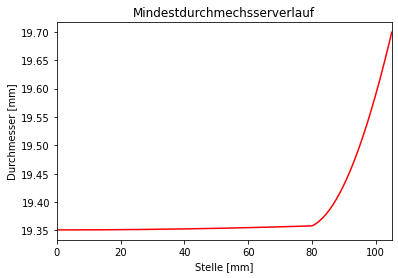

In [46]:
plt.xlim(0,lan2)

x = np.linspace(0,lan2,200)
ax = plt.subplot()

MT = M_t(x)
MB = Mb_ges(x)
y =Mindest_Durchmesser(MT,MB,S,Sigma_w)
print(max(y))
print(min(y))

plt.plot(x,y,"-r")

plt.title("Mindestdurchmechsserverlauf")
plt.ylabel("Durchmesser [mm]")
plt.xlabel("Stelle [mm]")

# Schraubenflansch

In [47]:
pzul_skopf= 500 #N/mm^2
E_stahl = 210000 #GPa
E_platten = 210000 #GPa
alpha_A = 1.4 #Anziehfaktor Drehmomentenschlüssel
Rsz = 10*10^-3 #mm (Gemittelte Rautiefe an den Trennfugen)
PHI = 30

n_=1
lk = 2*7 #mm
ut = 0.2




In [48]:
#Schraube: 4mal M8x25 - 8.8

SW = 13
k = 5.3
dw = 11.63
e =14.4
l = 25 
Rm = 8*100
Rp02 = 8*8*10
w =1

print(M_an)

130812.28199333863


## Fqmax

In [49]:
Fq_max = (2*M_an)/(4*70)
print(f"Fq_max = {round(Fq_max,3)} N")

Fq_max = 934.373 N


### Klemmkraft

In [50]:
print(M_an)
F_kerf = (2*M_an)/(4*ut*70)
print(f"F_kerf = {round(F_kerf,3)} N")

130812.28199333863
F_kerf = 4671.867 N


### Nachbiegigkeiten 

In [51]:
#Aers Berechnung
Da = 20 #mm
dh = 9 #mm

In [52]:
D_AGr = dw+ w*lk*math.tan(PHI * math.pi / 180)
print(D_AGr)

19.712903768654762


In [53]:
if D_AGr < Da:
    print("yes")

yes


In [54]:
top1 = (dw+dh)*(dw+w*lk*math.tan(PHI * math.pi / 180)- dh)
top2 = (dw-dh)*(dw+w*lk*math.tan(PHI * math.pi / 180)+ dh)
top = 2*np.log(top1/top2)
bot = w*E_platten*math.pi*dh*math.tan(PHI * math.pi / 180)

In [55]:
nachb_p = top/bot
print(f"Nachb_p = {round(nachb_p,8)}mm/N")

Nachb_p = 6.3e-07mm/N


In [56]:
#Gewinde daten:
d = 8
d2 = 7.19
d3 = 6.47

In [57]:
A_N = (math.pi*d**2)/4 
A_d3 = (math.pi*d3**2)/4
print(f"A_N = {A_N}")
print(f"A_d3 = {A_d3}")

#Nachbiegigkeit_schraubenkopf
nachb_sk = (0.5*d)/(E_stahl*A_N)
print(f"nachbiegigkeit_schraubenkopf = {nachb_sk}")

#Nachgiebigkeit des eingeschraubten Schraubengwindekerns
nachb_g = (0.5*d)/(E_stahl*A_d3)
print(f"nachb_g = {nachb_g}")

#Nachgiebigkeit des Mutter- bzw. Einschraubgewindebereichs
nachb_M = (0.4*d)/(E_stahl*A_N)
print(f"nachb_M = {nachb_M}")

#Nachgiebigkeit der Gewindes
lgew = lk
nachb_Gew = lgew/(E_stahl * A_d3)
print(f"nachb_Gew = {nachb_Gew}")

nachb_s = nachb_g + nachb_sk + nachb_M + nachb_Gew

print("\n\n")
print(f"Nachbiegigkeit der Schraube = {nachb_s}")


A_N = 50.26548245743669
A_d3 = 32.87747397816424
nachbiegigkeit_schraubenkopf = 3.789403406949889e-07
nachb_g = 5.7935165762034e-07
nachb_M = 3.0315227255599115e-07
nachb_Gew = 2.02773080167119e-06



Nachbiegigkeit der Schraube = 3.28917507254251e-06


## Setzkraft

In [58]:
fz = 3+(2*4.5) + (1*2.5)

In [59]:
Fz = (fz*10**-3)/(nachb_s + nachb_p)
print(f"Fz = {round(Fz,4)} N")

Fz = 3703.055 N


In [60]:
FMmin = Fz + F_kerf
print(f"FMmin = {round(FMmin,4)} N")

FMmin = 8374.9222 N


In [61]:
FMmax = alpha_A* FMmin
print(f"FMmax ={round(FMmax,4)} N")

FMmax =11724.891 N


In [62]:
Fv = FMmin - Fz 
print(f"Fv = {round(Fv,3)} N")

Fv = 4671.867 N


In [63]:
d_o = (d2+d3)/2
print(f"d_o= {d_o}")
A_o = (math.pi/4)*(d_o**2)
print(f"A_o = {round(A_o,3)} mm^2")

d_o= 6.83
A_o = 36.638 mm^2


In [64]:
v = 0.9
FMzul = v*Rp02*A_o
print(F"FMzul = {round(FMzul,3)} N")


FMzul = 21103.465 N


In [65]:
Fsmax = FMzul + 0
print(f"Fsmax = {round(Fsmax,3)} N")

Fsmax = 21103.465 N


In [66]:
F_KRmin = (FMzul/alpha_A)-Fz
print(f"F_KRmin = {round(F_KRmin,3)} N")

F_KRmin = 11370.849 N


In [67]:
S_G = F_KRmin/F_kerf
print(S_G)

2.4338981011053837


In [68]:
A_pmin = (math.pi/4)*((dw**2)-(dh**2))
print(A_pmin)

42.61326961163903


In [69]:
pmax = FMzul/A_pmin

In [70]:
Skauf = pzul_skopf / pmax
print(Skauf)

1.0096273110881981


# WN verbindung

### Abtrieb WN

In [71]:
#abtriebs Welle: DIN 5480-W25 x 1.25 x 18
ltr = zahnwelle_lange(18,25,1.25,M_ab,1,0)
print(ltr)
print(ltr/22.5)

d = 22.5mm
d2 = 22.5mm
d3 = 24.75mm
pzul=105.0N/mm^2
28.967827244229344
1.2874589886324153


### Schaltmuffe 

In [72]:
ltr = zahnwelle_lange(22,120,5,M_ab/i34,3,0)
print(ltr)
print(ltr/110)

d = 110mm
d2 = 110mm
d3 = 119.0mm
pzul=67.5N/mm^2
0.9311404765696845
0.008464913423360768


### Keilwelle Zahnrad 3

In [73]:
d= 62
D = 68
k = 0.75
i = 8
po = 150
pzul  = 0.7*po

ltr = (T3*1000)/(((D+d)/4)*((D-d)/2)*pzul*i*k)
print(f"ltr_min = {round(ltr,2)}mm")
print(round(ltr/d,2))

ltr_min = 4.35mm
0.07


### Keilwelle Zahnrad 4

In [74]:
d= 52
D = 58
k = 0.75
i = 8
po = 150
pzul  = 0.7*po

ltr = (M_ab)/(((D+d)/4)*((D-d)/2)*pzul*i*k)
print(f"ltr_min = {round(ltr,2)}mm")
print(round(ltr/d,2))

ltr_min = 10.5mm
0.2
